In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as skm
import tensorflow as tf
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

## import dataset + preprocess

In [ ]:
df = pd.read_csv("S1Data.csv")
## from article of data set, Event = death event

In [ ]:
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)

In [ ]:
df.head()
#df.info()

,TIME,Event,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK
0,97,0,0,0,0,0,1,43.0,50,135,1.30,237000.00,358
1,180,0,1,1,1,0,1,73.0,30,142,1.18,160000.00,231
2,31,1,1,1,0,1,0,70.0,20,134,1.83,263358.03,582
3,87,0,1,0,0,0,1,65.0,25,141,1.10,298000.00,305
4,113,0,1,0,0,0,0,64.0,60,137,1.00,242000.00,1610


In [ ]:
# normalize all variables besides event
continuous_cols = ['TIME', 'Age', 'Ejection.Fraction', 'Sodium', 'Creatinine', 'Pletelets', 'CPK']
df[continuous_cols] = (df[continuous_cols] - df[continuous_cols].mean())/df[continuous_cols].std()

<Axes: >

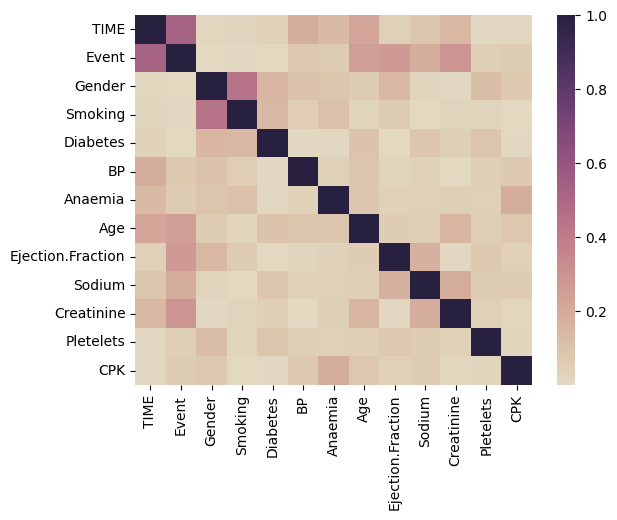

In [ ]:
# make heatmap
corr = abs(df.corr())
sns.heatmap(corr, cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

In [ ]:
df.head()

,TIME,Event,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK
0,-0.428541,0,0,0,0,0,1,-1.499300,1.006890,-0.368369,-0.090748,-2.694978e-01,-0.230694
1,0.640851,0,1,1,1,0,1,1.022808,-0.683035,1.218042,-0.206745,-1.056785e+00,-0.361583
2,-1.278901,1,1,1,0,1,0,0.770597,-1.527998,-0.594999,0.421572,7.523048e-09,0.000165
3,-0.557383,0,1,0,0,0,1,0.350246,-1.105517,0.991412,-0.284076,3.541970e-01,-0.285317
4,-0.222393,0,1,0,0,0,0,0.266176,1.851853,0.084892,-0.380740,-2.183753e-01,1.059645


In [ ]:
X = df.drop(labels = ['Event'], axis = 1)
y = df['Event']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 82)

## Naive Bayes Model

In [ ]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

## Random Forest Classifier Model

In [ ]:
## Random Forest Classification
NUM_TREES = 100
MAX_DEPTH = 20

model_rfc = RandomForestClassifier(n_estimators = NUM_TREES, max_depth = MAX_DEPTH, criterion='entropy', random_state = 82)

In [ ]:
model_rfc.fit(X_train, y_train)
y_pred_rfc = model_rfc.predict(X_test)

In [ ]:
parameters = {'n_estimators': [30, 40, 50, 60, 70, 80, 90, 100, 110, 120],
              'max_depth': [3, 7, 11, 15, 20],
              'max_leaf_nodes': [2, 3, 4],
              'criterion': ('gini', 'entropy', 'log_loss')}

clf = GridSearchCV(param_grid = parameters, estimator = RandomForestClassifier(), cv = 5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': [3, 7, 11, 15, 20],
                         'max_leaf_nodes': [2, 3, 4],
                         'n_estimators': [30, 40, 50, 60, 70, 80, 90, 100, 110,
                                          120]})

In [ ]:
y_pred_rfc_clf = clf.predict(X_test)

## Support Vector Machine Model

In [ ]:
model_svm = svm.SVC(kernel = 'sigmoid', C = 1.0, random_state = 82)
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

## Multi-Layer Perceptron Model

In [ ]:
model_mlp = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (12, )),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
model_mlp.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 7)

In [ ]:
model_mlp.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2, callbacks = early_stopping)

Epoch 1/100
10/10 [==============================] - 1s 29ms/step - loss: 0.6734 - accuracy: 0.6440 - val_loss: 0.6091 - val_accuracy: 0.7708
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5910 - accuracy: 0.7696 - val_loss: 0.5186 - val_accuracy: 0.7917
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5196 - accuracy: 0.8010 - val_loss: 0.4378 - val_accuracy: 0.8125
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.4522 - accuracy: 0.8168 - val_loss: 0.3949 - val_accuracy: 0.8542
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4074 - accuracy: 0.8325 - val_loss: 0.3648 - val_accuracy: 0.8750
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.3790 - accuracy: 0.8272 - val_loss: 0.3414 - val_accuracy: 0.8750
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.3609 - accuracy: 0.8482 - val_loss: 0.3483 - val_accuracy: 0.8750
Epoch 8/100


In [ ]:
y_pred_mlp = model_mlp.predict(X_test)
y_pred_mlp = np.where(y_pred_mlp > 0.5, 1, 0)

2/2 [==============================] - 0s 6ms/step


## Convolutional Neural Network Model

In [ ]:
model_cnn = tf.keras.Sequential([
    #tf.keras.layers.Input(shape = (12, )),

    tf.keras.layers.Conv1D(32, 3, activation = 'relu', padding = 'same'),
    tf.keras.layers.Conv1D(32, 3, activation = 'relu', padding = 'same'),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_mlp.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2, callbacks = early_stopping)

Epoch 1/100
10/10 [==============================] - 0s 11ms/step - loss: 0.0606 - accuracy: 0.9948 - val_loss: 0.5198 - val_accuracy: 0.8958
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0522 - accuracy: 1.0000 - val_loss: 0.5530 - val_accuracy: 0.8750
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0480 - accuracy: 1.0000 - val_loss: 0.5547 - val_accuracy: 0.8958
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0423 - accuracy: 1.0000 - val_loss: 0.5657 - val_accuracy: 0.8958
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0379 - accuracy: 1.0000 - val_loss: 0.5856 - val_accuracy: 0.8750
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0386 - accuracy: 0.9948 - val_loss: 0.6128 - val_accuracy: 0.8750
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0272 - accuracy: 1.0000 - val_loss: 0.6140 - val_accuracy: 0.8958
Epoch 8/100


In [ ]:
y_pred_cnn = model_cnn.predict(X_test)
y_pred_cnn = np.where(y_pred_cnn > 0.5, 1, 0)

NameError: name 'model_cnn' is not defined

## Evaluation

In [ ]:
evaluation_df = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'Confusion Matrix'])

In [ ]:
def evaluate(df, name, y_pred, y_test):
  acc = str(skm.accuracy_score(y_test, y_pred))
  prec = str(skm.precision_score(y_test, y_pred))
  recall = str(skm.recall_score(y_test, y_pred))
  f1 = str(skm.f1_score(y_test, y_pred))
  conf = str(skm.confusion_matrix(y_test, y_pred))
  df.loc[int(len(df.index))] = [name, acc, prec, recall, f1, conf]
  return df

In [ ]:
evaluate(evaluation_df, "Naive Bayes Classifier", y_pred_nb, y_test)

,Model,Accuracy,Precision,Recall,F1,Confusion Matrix
0,Naive Bayes Classifier,0.75,0.7272727272727273,0.4,0.5161290322580645,[[37 3]\n [12 8]]


In [ ]:
evaluate(evaluation_df, "Random Forest Classifier", y_pred_rfc, y_test)

,Model,Accuracy,Precision,Recall,F1,Confusion Matrix
0,Naive Bayes Classifier,0.75,0.7272727272727273,0.4,0.5161290322580645,[[37 3]\n [12 8]]
1,Random Forest Classifier,0.9333333333333333,0.9444444444444444,0.85,0.8947368421052632,[[39 1]\n [ 3 17]]


In [ ]:
evaluate(evaluation_df, "Random Forest Classifier w/ GridSearchCV", y_pred_rfc_clf, y_test)

,Model,Accuracy,Precision,Recall,F1,Confusion Matrix
0,Naive Bayes Classifier,0.75,0.7272727272727273,0.4,0.5161290322580645,[[37 3]\n [12 8]]
1,Random Forest Classifier,0.9333333333333333,0.9444444444444444,0.85,0.8947368421052632,[[39 1]\n [ 3 17]]
2,Support Vector Machine,0.8666666666666667,0.8333333333333334,0.75,0.7894736842105262,[[37 3]\n [ 5 15]]
3,Multi-Layer Perceptron,0.9,0.8888888888888888,0.8,0.8421052631578948,[[38 2]\n [ 4 16]]
4,Random Forest Classifier w/ GridSearchCV,0.8666666666666667,0.9285714285714286,0.65,0.7647058823529412,[[39 1]\n [ 7 13]]
5,Random Forest Classifier w/ GridSearchCV,0.85,0.9230769230769231,0.6,0.7272727272727274,[[39 1]\n [ 8 12]]


In [ ]:
evaluate(evaluation_df, "Support Vector Machine", y_pred_svm, y_test)

,Model,Accuracy,Precision,Recall,F1,Confusion Matrix
0,Naive Bayes Classifier,0.75,0.7272727272727273,0.4,0.5161290322580645,[[37 3]\n [12 8]]
1,Random Forest Classifier,0.9333333333333333,0.9444444444444444,0.85,0.8947368421052632,[[39 1]\n [ 3 17]]
2,Support Vector Machine,0.8666666666666667,0.8333333333333334,0.75,0.7894736842105262,[[37 3]\n [ 5 15]]


In [ ]:
evaluate(evaluation_df, "Multi-Layer Perceptron", y_pred_mlp, y_test)

,Model,Accuracy,Precision,Recall,F1,Confusion Matrix
0,Naive Bayes Classifier,0.75,0.7272727272727273,0.4,0.5161290322580645,[[37 3]\n [12 8]]
1,Random Forest Classifier,0.9333333333333333,0.9444444444444444,0.85,0.8947368421052632,[[39 1]\n [ 3 17]]
2,Support Vector Machine,0.8666666666666667,0.8333333333333334,0.75,0.7894736842105262,[[37 3]\n [ 5 15]]
3,Multi-Layer Perceptron,0.9,0.8888888888888888,0.8,0.8421052631578948,[[38 2]\n [ 4 16]]


In [ ]:
evaluate(evaluation_df, "Convolutional Neural Networks", y_pred_cnn, y_test)

NameError: name 'y_pred_cnn' is not defined